<h1 style="text-align: center;">DATA 255 - Fall24 - Group Project</h1>

<h2 style="text-align: center;"> Pneumonia Detection using chest X-Ray and Deep Learning Technologies

## 1. Importing necessary libraries

In [ ]:
import os
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import shutil
import random
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch

## 2. Loading and Exploring the data

#### <b> 2.1. Importing train, Validation and test Dataset, and exploring the classes of images

In [1]:
# Define the base directory directly to the dataset path
base_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray"
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
test_dir = os.path.join(base_dir, 'test')

# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((150, 150)),  # Resize to 150x150
    transforms.ToTensor(),         # Convert image to PyTorch tensor
    transforms.Normalize(mean=[0.5], std=[0.5])  # Normalize to range [-1, 1]
])

# Load the datasets
train_dataset = datasets.ImageFolder(train_dir, transform=transform)
val_dataset = datasets.ImageFolder(val_dir, transform=transform)
test_dataset = datasets.ImageFolder(test_dir, transform=transform)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Class mappings (optional, to verify classes)
class_names = train_dataset.classes
print("Class Names:", class_names)

Class Names: ['NORMAL', 'PNEUMONIA']


## 3. Preprocessing the Data 

#### <b> 3.1. Data Redistribution for Chest X-Ray Pneumonia Dataset

In [2]:
# Paths to original directories
train_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/train'
val_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/val'
test_dir = '/kaggle/input/chest-xray-pneumonia/chest_xray/test'

# New directories for redistributed data
base_dir = '/kaggle/working/chest_xray_redistributed'
train_new_dir = os.path.join(base_dir, 'train')
val_new_dir = os.path.join(base_dir, 'val')
test_new_dir = os.path.join(base_dir, 'test')

# Create new directories
os.makedirs(train_new_dir, exist_ok=True)
os.makedirs(val_new_dir, exist_ok=True)
os.makedirs(test_new_dir, exist_ok=True)

for cls in ['NORMAL', 'PNEUMONIA']:
    os.makedirs(os.path.join(train_new_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(val_new_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_new_dir, cls), exist_ok=True)

# Function to gather all images in a directory structure
def get_all_images(directory, class_name):
    full_path = os.path.join(directory, class_name)
    return [os.path.join(full_path, fname) for fname in os.listdir(full_path) if fname.endswith(('.png', '.jpg', '.jpeg'))]

# Gather images from the original directories
all_normal = get_all_images(train_dir, 'NORMAL') + get_all_images(val_dir, 'NORMAL') + get_all_images(test_dir, 'NORMAL')
all_pneumonia = get_all_images(train_dir, 'PNEUMONIA') + get_all_images(val_dir, 'PNEUMONIA') + get_all_images(test_dir, 'PNEUMONIA')

# Shuffle images for random distribution
random.shuffle(all_normal)
random.shuffle(all_pneumonia)

# Function to split data into train, validation, and test sets
def split_data(data, train_ratio, val_ratio):
    train_split = int(len(data) * train_ratio)
    val_split = int(len(data) * (train_ratio + val_ratio))
    return data[:train_split], data[train_split:val_split], data[val_split:]

# Split the data
train_normal, val_normal, test_normal = split_data(all_normal, 0.7, 0.15)
train_pneumonia, val_pneumonia, test_pneumonia = split_data(all_pneumonia, 0.7, 0.15)

# Function to copy files to target directory
def copy_files(file_list, target_dir):
    for file_path in file_list:
        shutil.copy(file_path, target_dir)

# Copy files to new directories
copy_files(train_normal, os.path.join(train_new_dir, 'NORMAL'))
copy_files(val_normal, os.path.join(val_new_dir, 'NORMAL'))
copy_files(test_normal, os.path.join(test_new_dir, 'NORMAL'))

copy_files(train_pneumonia, os.path.join(train_new_dir, 'PNEUMONIA'))
copy_files(val_pneumonia, os.path.join(val_new_dir, 'PNEUMONIA'))
copy_files(test_pneumonia, os.path.join(test_new_dir, 'PNEUMONIA'))

print("Data redistribution complete!")

Data redistribution complete!


#### <b> 3.2. Analyzing Redistributed Datasets

In [3]:
# Paths to redistributed data directories
redistributed_train_dir = '/kaggle/working/chest_xray_redistributed/train'
redistributed_val_dir = '/kaggle/working/chest_xray_redistributed/val'
redistributed_test_dir = '/kaggle/working/chest_xray_redistributed/test'

# Function to count images per class
def count_images_per_class(directory):
    dataset = datasets.ImageFolder(directory)
    class_counts = {class_name: 0 for class_name in dataset.classes}
    for _, label in dataset:
        class_name = dataset.classes[label]
        class_counts[class_name] += 1
    return class_counts

# Count images in redistributed datasets
redistributed_train_counts = count_images_per_class(redistributed_train_dir)
redistributed_val_counts = count_images_per_class(redistributed_val_dir)
redistributed_test_counts = count_images_per_class(redistributed_test_dir)

# Total images in redistributed datasets
total_images_redistributed = (
    sum(redistributed_train_counts.values()) +
    sum(redistributed_val_counts.values()) +
    sum(redistributed_test_counts.values())
)

# Calculate ratios
train_ratio_redistributed = sum(redistributed_train_counts.values()) / total_images_redistributed * 100
val_ratio_redistributed = sum(redistributed_val_counts.values()) / total_images_redistributed * 100
test_ratio_redistributed = sum(redistributed_test_counts.values()) / total_images_redistributed * 100

# Print ratios
print("Redistributed Data Ratios:")
print(f"Training Set: {sum(redistributed_train_counts.values())} images ({train_ratio_redistributed:.2f}% of total)")
print(f"Validation Set: {sum(redistributed_val_counts.values())} images ({val_ratio_redistributed:.2f}% of total)")
print(f"Test Set: {sum(redistributed_test_counts.values())} images ({test_ratio_redistributed:.2f}% of total)")

# Print class-wise distributions
print("\nClass-wise Distributions:")
print(f"Train Class Distribution: {redistributed_train_counts}")
print(f"Validation Class Distribution: {redistributed_val_counts}")
print(f"Test Class Distribution: {redistributed_test_counts}")


Redistributed Data Ratios:
Training Set: 4099 images (70.00% of total)
Validation Set: 878 images (14.99% of total)
Test Set: 879 images (15.01% of total)

Class-wise Distributions:
Train Class Distribution: {'NORMAL': 1108, 'PNEUMONIA': 2991}
Validation Class Distribution: {'NORMAL': 237, 'PNEUMONIA': 641}
Test Class Distribution: {'NORMAL': 238, 'PNEUMONIA': 641}


### You want to avoid the possibility of overfitting by using a too-small validation set. By allocating 15% for both validation and test sets, you ensure that both the validation and test sets are sufficiently large and representative of the entire dataset

### With 80:10:10 split, the model might overfit on the training set since the validation set is too small to give meaningful feedback

#### <b> 3.3. Visually showing how many images present in the train, Validation and test Redistributed Dataset

Train Class Distribution: {'NORMAL': 1108, 'PNEUMONIA': 2991}
Validation Class Distribution: {'NORMAL': 237, 'PNEUMONIA': 641}
Test Class Distribution: {'NORMAL': 238, 'PNEUMONIA': 641}


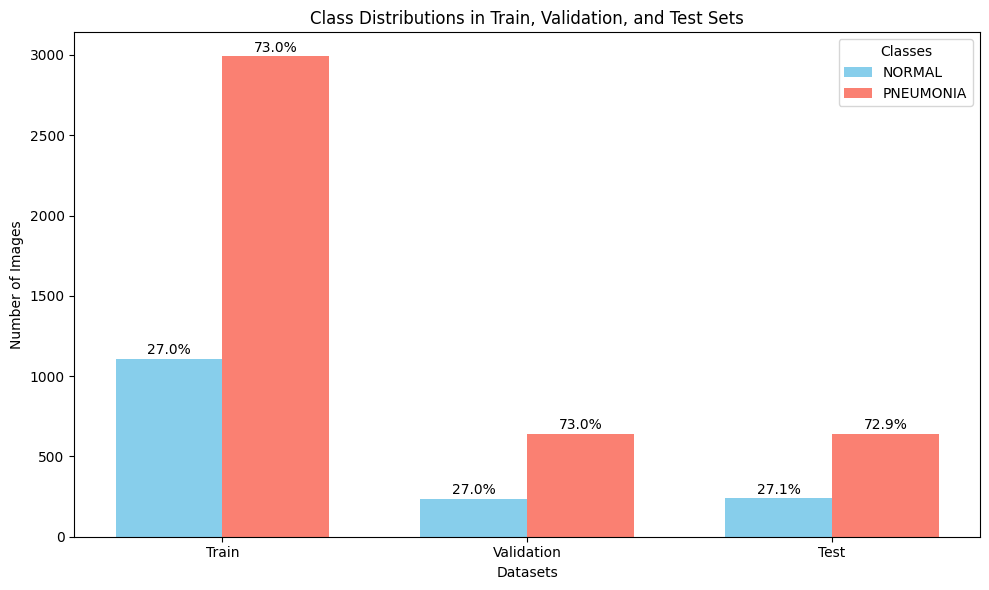

In [4]:
# Function to count images per class using PyTorch ImageFolder
def count_images_per_class(directory):
    dataset = datasets.ImageFolder(directory)
    class_counts = {class_name: 0 for class_name in dataset.classes}
    for _, label in dataset:
        class_name = dataset.classes[label]
        class_counts[class_name] += 1
    return class_counts

# Count images in redistributed datasets
redistributed_train_counts = count_images_per_class(redistributed_train_dir)
redistributed_val_counts = count_images_per_class(redistributed_val_dir)
redistributed_test_counts = count_images_per_class(redistributed_test_dir)

# Print class distributions
print("Train Class Distribution:", redistributed_train_counts)
print("Validation Class Distribution:", redistributed_val_counts)
print("Test Class Distribution:", redistributed_test_counts)

# Visualization
datasets = ['Train', 'Validation', 'Test']
class_labels = list(redistributed_train_counts.keys())  # Dynamically get class labels

# Prepare data for plotting
data = [
    [redistributed_train_counts[class_labels[0]], redistributed_train_counts[class_labels[1]]],
    [redistributed_val_counts[class_labels[0]], redistributed_val_counts[class_labels[1]]],
    [redistributed_test_counts[class_labels[0]], redistributed_test_counts[class_labels[1]]],
]

# Plot bar chart
x = range(len(datasets))
bar_width = 0.35

plt.figure(figsize=(10, 6))
bars1 = plt.bar(x, [d[0] for d in data], width=bar_width, label=class_labels[0], color='skyblue')
bars2 = plt.bar([i + bar_width for i in x], [d[1] for d in data], width=bar_width, label=class_labels[1], color='salmon')

# Add percentage labels on top of the bars
totals = [sum(d) for d in data]
for i, bars in enumerate([bars1, bars2]):  # Loop through class-wise bars
    for bar, count in zip(bars, [d[i] for d in data]):
        percent = (count / totals[bars.index(bar)]) * 100  # Calculate percentage
        # Place percentage labels clearly above the bars
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 10, f'{percent:.1f}%',
                 ha='center', fontsize=10, color='black', va='bottom')

# Add labels and title
plt.xlabel('Datasets')
plt.ylabel('Number of Images')
plt.title('Class Distributions in Train, Validation, and Test Sets')
plt.xticks([i + bar_width / 2 for i in x], datasets)
plt.legend(title="Classes")
plt.tight_layout()
plt.show()

## 4. Basic Data Exploration

#### <b> 4.1. Displaying Sample Images from Redistributed Dataset

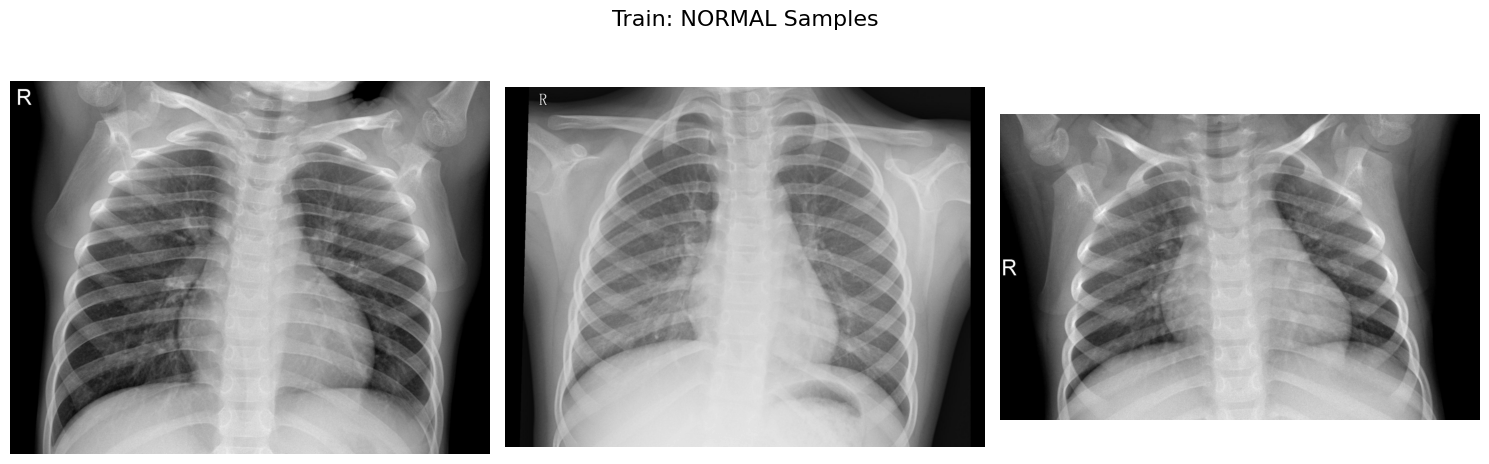

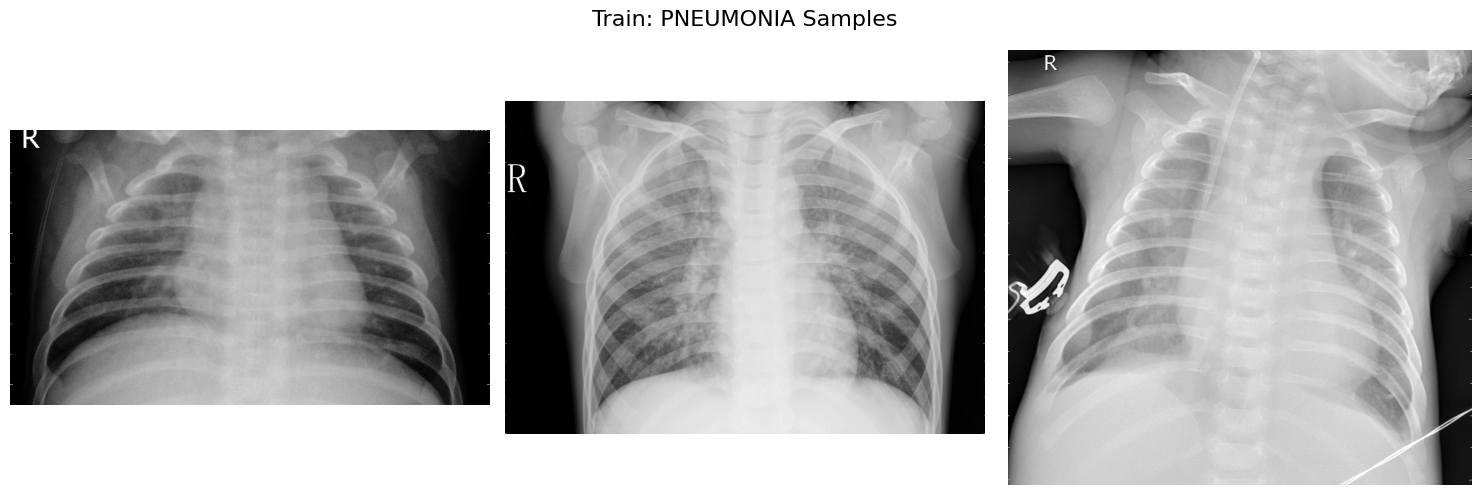

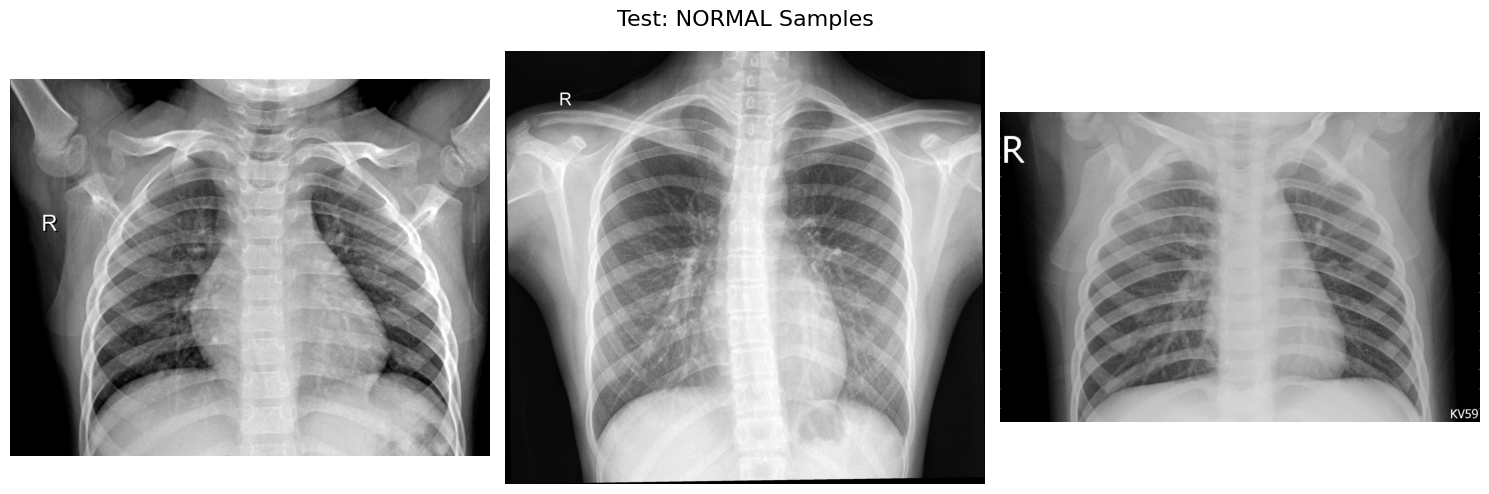

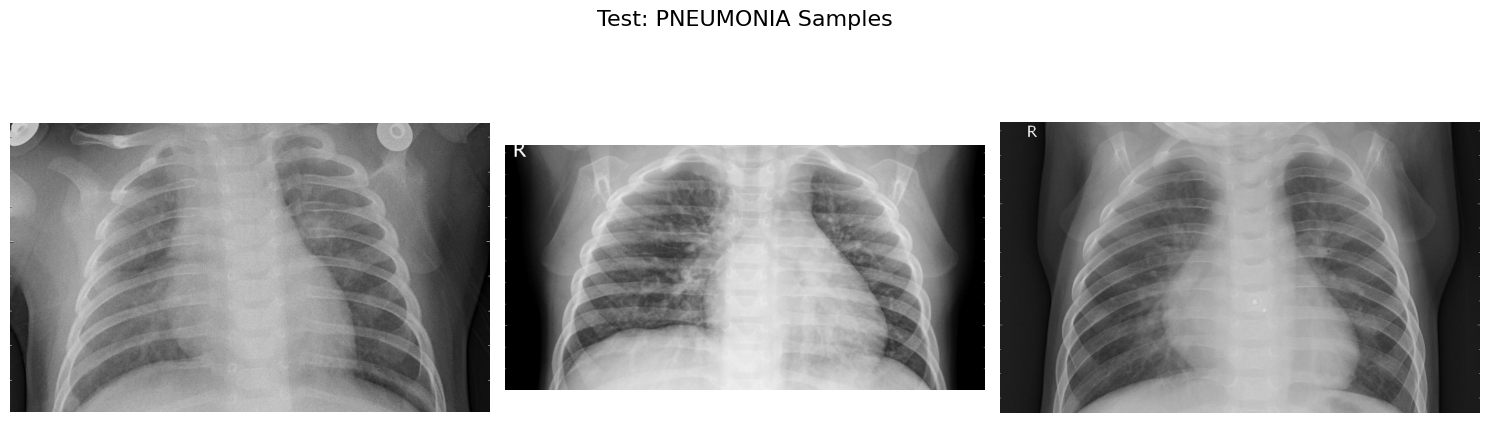

In [5]:
# Function to get image file paths from a specific class
def get_sample_images(directory, class_name, num_samples=3):
    class_dir = os.path.join(directory, class_name)
    image_files = os.listdir(class_dir)
    sample_files = image_files[:num_samples]  # Take the first few images
    return [os.path.join(class_dir, file) for file in sample_files]

# Get samples from train and test datasets
train_normal_samples = get_sample_images(redistributed_train_dir, 'NORMAL', 3)
train_pneumonia_samples = get_sample_images(redistributed_train_dir, 'PNEUMONIA', 3)
test_normal_samples = get_sample_images(redistributed_test_dir, 'NORMAL', 3)
test_pneumonia_samples = get_sample_images(redistributed_test_dir, 'PNEUMONIA', 3)

# Function to display images
def display_images(image_paths, title, rows=1, cols=3):
    plt.figure(figsize=(15, 5))
    for i, image_path in enumerate(image_paths):
        img = Image.open(image_path)
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Display samples
display_images(train_normal_samples, "Train: NORMAL Samples")
display_images(train_pneumonia_samples, "Train: PNEUMONIA Samples")
display_images(test_normal_samples, "Test: NORMAL Samples")
display_images(test_pneumonia_samples, "Test: PNEUMONIA Samples")

#### <b> 4.2. Calculating Average Image Sizes for Dataset Classes

In [6]:
# Function to calculate average image sizes for classes
def get_image_sizes(directory):
    sizes = {}
    for cls in ['NORMAL', 'PNEUMONIA']:
        class_dir = os.path.join(directory, cls)
        image_sizes = []
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            with Image.open(img_path) as img:  # Open the image using PIL
                img_size = img.size  # Returns (width, height)
                image_sizes.append(img_size)
        
        # Calculate the average width and height for the class
        avg_width = sum([size[0] for size in image_sizes]) // len(image_sizes)
        avg_height = sum([size[1] for size in image_sizes]) // len(image_sizes)
        sizes[cls] = (avg_width, avg_height)
    return sizes


# Get average image sizes for each dataset
redistributed_train_sizes = get_image_sizes(redistributed_train_dir)
redistributed_val_sizes = get_image_sizes(redistributed_val_dir)
redistributed_test_sizes = get_image_sizes(redistributed_test_dir)

# Print average image sizes for each dataset
print("Average Image Sizes for Train, Validation, and Test Sets:")
print(f"Training Set - NORMAL: {redistributed_train_sizes['NORMAL']}, PNEUMONIA: {redistributed_train_sizes['PNEUMONIA']}")
print(f"Validation Set - NORMAL: {redistributed_val_sizes['NORMAL']}, PNEUMONIA: {redistributed_val_sizes['PNEUMONIA']}")
print(f"Test Set - NORMAL: {redistributed_test_sizes['NORMAL']}, PNEUMONIA: {redistributed_test_sizes['PNEUMONIA']}")

Average Image Sizes for Train, Validation, and Test Sets:
Training Set - NORMAL: (1690, 1380), PNEUMONIA: (1193, 817)
Validation Set - NORMAL: (1674, 1369), PNEUMONIA: (1222, 839)
Test Set - NORMAL: (1678, 1378), PNEUMONIA: (1175, 811)


#### <b> 4.3. Analyzing Pixel Intensity Distribution for Dataset Classes

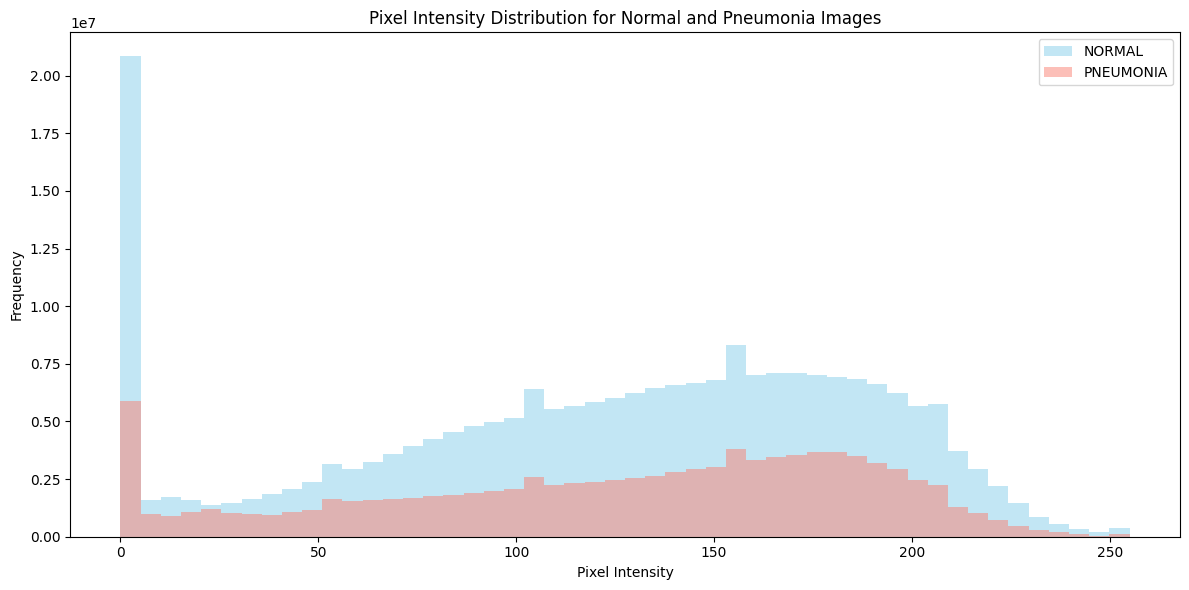

In [7]:
# Function to extract pixel data from sample images
def extract_pixel_data(directory, class_name, sample_size=100):
    class_dir = os.path.join(directory, class_name)
    image_paths = [os.path.join(class_dir, fname) for fname in os.listdir(class_dir)]
    pixel_values = []
    
    for img_path in image_paths[:sample_size]:  # Take a subset of images
        with Image.open(img_path) as img:
            img = img.convert('L')  # Convert to grayscale for simplicity
            img_array = np.array(img)  # Convert to numpy array
            pixel_values.append(img_array.flatten())  # Flatten the array into 1D
        
    return np.concatenate(pixel_values)  # Concatenate all pixel values

# Extract pixel data for Normal and Pneumonia
normal_pixel_data = extract_pixel_data(redistributed_train_dir, 'NORMAL')
pneumonia_pixel_data = extract_pixel_data(redistributed_train_dir, 'PNEUMONIA')

# Plot the histograms of pixel values
plt.figure(figsize=(12, 6))

# Plot histogram for NORMAL class
plt.hist(normal_pixel_data, bins=50, alpha=0.5, label='NORMAL', color='skyblue')

# Plot histogram for PNEUMONIA class
plt.hist(pneumonia_pixel_data, bins=50, alpha=0.5, label='PNEUMONIA', color='salmon')

# Adding labels and title
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.title('Pixel Intensity Distribution for Normal and Pneumonia Images')
plt.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


### we will extract pixel values from a few sample images from each class, then plot their pixel intensity distributions.. The histograms represent the distribution of pixel intensities across the images in each class. A higher intensity (closer to 255) indicates a brighter pixel, while lower values (closer to 0) represent darker pixels.

### The NORMAL images have a sharp peak in the lower pixel intensity range (around 0–50), which suggests that most of the pixels in these images are very dark (low intensity). This likely reflects the air in the lungs, which appears black in X-ray images. The distribution also shows some pixels with higher intensities (shifting toward the 100–150 range), which could correspond to bones, tissues, and other structures that are slightly brighter than air.

### The PNEUMONIA images have a broader distribution, with higher frequencies in the mid to higher pixel intensity range (around 50–150). This indicates that there are more variations in pixel intensity in PNEUMONIA images. This suggests that PNEUMONIA images often contain more areas of consolidation, infection, or inflammation, which may appear lighter (higher pixel intensity) than healthy lung tissue (air).

### There's significant overlap in pixel intensity distributions between the two classes, indicating that there is some similarity in pixel values, but the PNEUMONIA distribution tends to shift toward higher pixel intensities overall, likely due to the presence of inflammation and infection within the lungs.

### The class imbalance is apparent, with the "PNEUMONIA" class being the dominant one.¶

### 3 methods to correct class imbalance:
- ** Over sample under sample **- We cannot over or under-sample because we have image data. (SMOTE- synthetic minority over-sampling technique)
- Assigning Class weights (Class Weights ensure that the model does not ignore the minority class. It assigns higher importance to the underrepresented class by adjusting the loss function to penalize incorrect predictions on the minority class more heavily.)
- Data Augmentation- Applying data augmentation techniques (such as rotations, flips, shifts, etc.) can help to increase the size of the minority class while maintaining diversity in the data. In the context of chest X-ray images might not be ideal. Applying random transformations (e.g., rotation, zoom, flipping) to the "PNEUMONIA" class might alter the essential features that help identify pneumonia, leading to potentially unrealistic or misleading data. For instance, rotating or flipping a pneumonia image might change its appearance in a way that does not reflect real-life variations of pneumonia.

### we apply the class weights during modelling.

### Data Transformation:
Normalization (or rescaling) should be applied before data augmentation. The reason is that normalization ensures your pixel values are on a consistent scale, which is crucial for model convergence. Neural networks typically perform better when input data is normalized. Normalizing pixel values to a range of [0, 1] ensures the data fed into the model has consistent scales, making training easier and faster.
### 

Data Augmentat: ion
Data augmentation should be applied after normalization. The reason is that augmentation applies transformations to the image, and it's better to apply these transformations to already normalized images so that the augmented data also follows the same format as the original data. Augmentation artificially increases the diversity of your training data by applying various transformations (rotation, flip, zoom, etc.), helping your model generalize better. Augmentation can help improve the model's performance by creating more diverse samples for the minority class.

For training data, we use data augmentation parameters such as rotation, zoom, shifts, and flips, to artificially increase the diversity of the training dataset. The images are also normalized by scaling the pixel values to the range [0, 1] using rescale=1.0/255.0. For validation and test data, we only apply normalization (rescale=1.0/255.0) since we don’t want to augment these sets.

## 5. Data Transformation and Augmentation

#### <b> 5.1. Data Augmentation and DataLoader Setup for Training, Validation, and Testing

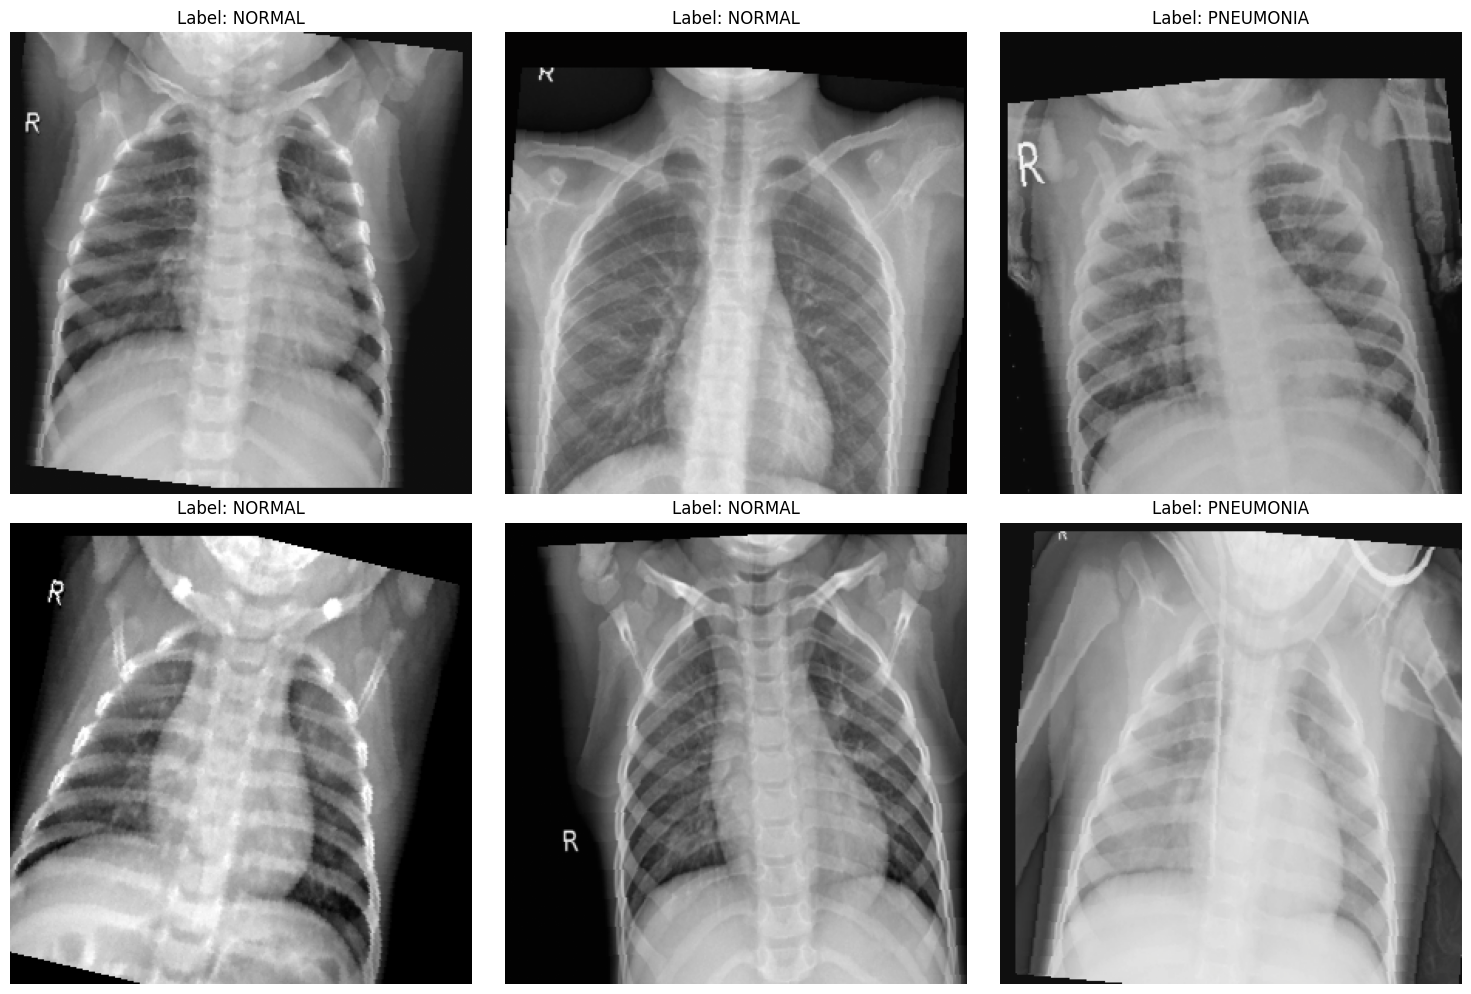

In [8]:
# Training transforms with augmentation
train_transforms = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize for InceptionV3
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                       std=[0.229, 0.224, 0.225])  # ImageNet stats
])

# Validation/Test transforms without augmentation
val_test_transforms = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize for InceptionV3
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], 
                       std=[0.229, 0.224, 0.225])  # ImageNet stats
])

# Load datasets
train_dataset = datasets.ImageFolder(root=redistributed_train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=redistributed_val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(root=redistributed_test_dir, transform=val_test_transforms)

# Create data loaders with num_workers for faster loading
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

def display_augmented_images(data_loader, class_names, num_images=6):
    images, labels = next(iter(data_loader))
    
    # Denormalize images
    mean = torch.tensor([0.485, 0.456, 0.406]).reshape(1, 3, 1, 1)
    std = torch.tensor([0.229, 0.224, 0.225]).reshape(1, 3, 1, 1)
    images = images * std + mean
    
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        ax = plt.subplot(2, 3, i + 1)
        img = images[i].permute(1, 2, 0).numpy()
        img = np.clip(img, 0, 1)  # Ensure values are in valid range
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        plt.title(f"Label: {class_names[labels[i]]}")
    plt.tight_layout()
    plt.show()

# Class names for the labels
class_names = train_dataset.classes

# Display augmented images from the training set
display_augmented_images(train_loader, class_names, num_images=6)

In [9]:
import os
import shutil
import random
import json
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn.functional as F
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader, WeightedRandomSampler
from lime import lime_image
import shap

## 6. Modeling and Training

#### <b> 6.1. Inception Model and Training Loop

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# Paths
train_dir = '/kaggle/working/chest_xray_redistributed/train'
val_dir = '/kaggle/working/chest_xray_redistributed/val'
test_dir = '/kaggle/working/chest_xray_redistributed/test'

# Training transforms with augmentation
train_transforms = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize for InceptionV3
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomRotation(15),
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),
    transforms.ColorJitter(brightness=0.2, contrast=0.2),
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])  # ImageNet stats
])

# Validation/Test transforms without augmentation
val_test_transforms = transforms.Compose([
    transforms.Resize((299, 299)),  # Resize for InceptionV3
    transforms.Grayscale(num_output_channels=3),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])  # ImageNet stats
])

# Load datasets
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(root=test_dir, transform=val_test_transforms)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2, pin_memory=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=2, pin_memory=True)

# Calculate class weights
class_counts = {'NORMAL': len([1 for _, label in train_dataset if label == 0]),
                'PNEUMONIA': len([1 for _, label in train_dataset if label == 1])}
class_weights = compute_class_weight(class_weight='balanced', classes=np.array([0, 1]),
                                      y=np.array([0] * class_counts['NORMAL'] + [1] * class_counts['PNEUMONIA']))
class_weights_tensor = torch.tensor(class_weights, dtype=torch.float).cuda()

# Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load pretrained InceptionV3 model
try:
    from torchvision.models import Inception_V3_Weights
    weights = Inception_V3_Weights.DEFAULT
    model = models.inception_v3(weights=weights)
except Exception as e:
    print("Could not load pretrained weights. Using an untrained model.", e)
    model = models.inception_v3(pretrained=False)

# Modify the final fully connected layer
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 2)  # 2 classes: NORMAL, PNEUMONIA

# Modify auxiliary classifier
if model.aux_logits:
    num_aux_features = model.AuxLogits.fc.in_features
    model.AuxLogits.fc = nn.Linear(num_aux_features, 2)

model = model.to(device)

# Loss function
criterion = nn.CrossEntropyLoss(weight=class_weights_tensor)

# Optimizer
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training function
def train_model(model, criterion, optimizer, train_loader, val_loader, dataset_sizes, device, num_epochs=10):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
                loader = train_loader
            else:
                model.eval()   # Set model to evaluate mode
                loader = val_loader

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in loader:
                inputs, labels = inputs.to(device), labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward pass
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    if isinstance(outputs, tuple):  # Handle Inception outputs
                        logits, aux_logits = outputs
                        loss = criterion(logits, labels) + 0.4 * criterion(aux_logits, labels)
                    else:
                        logits = outputs
                        loss = criterion(logits, labels)

                    _, preds = torch.max(logits, 1)

                    # Backward pass + optimize (only in training phase)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    print(f"Best val Acc: {best_acc:.4f}")
    model.load_state_dict(best_model_wts)
    return model

# Dataset sizes
dataset_sizes = {'train': len(train_dataset), 'val': len(val_dataset)}

# Train the model
num_epochs = 10
model = train_model(model, criterion, optimizer, train_loader, val_loader, dataset_sizes, device, num_epochs)

# Save the model
model_save_path = '/kaggle/working/chest_xray_inceptionv3.pth'
torch.save({
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'class_weights': class_weights_tensor,
    'class_names': train_dataset.classes
}, model_save_path)

print(f"Model saved to: {model_save_path}")

# Evaluation function
def evaluate_model(model, test_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    print("Classification Report:")
    print(classification_report(all_labels, all_preds, target_names=class_names))

    print("Confusion Matrix:")
    print(confusion_matrix(all_labels, all_preds))

# Evaluate the model
evaluate_model(model, test_loader, train_dataset.classes)

Downloading: "https://download.pytorch.org/models/inception_v3_google-0cc3c7bd.pth" to /root/.cache/torch/hub/checkpoints/inception_v3_google-0cc3c7bd.pth
100%|██████████| 104M/104M [00:00<00:00, 202MB/s] 


Epoch 1/10
train Loss: 0.3533 Acc: 0.9005
val Loss: 1.8870 Acc: 0.6036
Epoch 2/10
train Loss: 0.2733 Acc: 0.9314
val Loss: 0.1441 Acc: 0.9396
Epoch 3/10
train Loss: 0.2183 Acc: 0.9454
val Loss: 0.2073 Acc: 0.9123
Epoch 4/10
train Loss: 0.1989 Acc: 0.9502
val Loss: 0.1533 Acc: 0.9260
Epoch 5/10
train Loss: 0.2183 Acc: 0.9468
val Loss: 0.1104 Acc: 0.9590
Epoch 6/10
train Loss: 0.2063 Acc: 0.9536
val Loss: 0.1926 Acc: 0.9294
Epoch 7/10
train Loss: 0.1754 Acc: 0.9580
val Loss: 0.1286 Acc: 0.9544
Epoch 8/10
train Loss: 0.1718 Acc: 0.9546
val Loss: 0.2970 Acc: 0.8952
Epoch 9/10
train Loss: 0.1764 Acc: 0.9549
val Loss: 0.1042 Acc: 0.9670
Epoch 10/10
train Loss: 0.1598 Acc: 0.9556
val Loss: 0.0927 Acc: 0.9613
Best val Acc: 0.9670
Model saved to: /kaggle/working/chest_xray_inceptionv3.pth
Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.92      0.94       238
   PNEUMONIA       0.97      0.99      0.98       641

    accuracy          

## 7. Loading the Model for Inference and Testing the Final Model and Visualizing Predictions

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.92      0.94       238
   PNEUMONIA       0.97      0.99      0.98       641

    accuracy                           0.97       879
   macro avg       0.97      0.96      0.96       879
weighted avg       0.97      0.97      0.97       879


Confusion Matrix:
[[220  18]
 [  9 632]]

Detailed Metrics per Class:
NORMAL: {'precision': 0.9606986899563319, 'recall': 0.9243697478991597, 'f1-score': 0.9421841541755889, 'support': 238}
PNEUMONIA: {'precision': 0.9723076923076923, 'recall': 0.9859594383775351, 'f1-score': 0.9790859798605733, 'support': 641}

ROC AUC: 0.9945


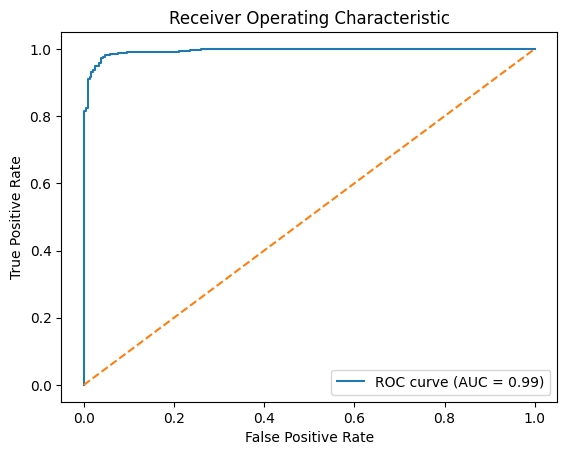

Precision-Recall AUC: 0.9979


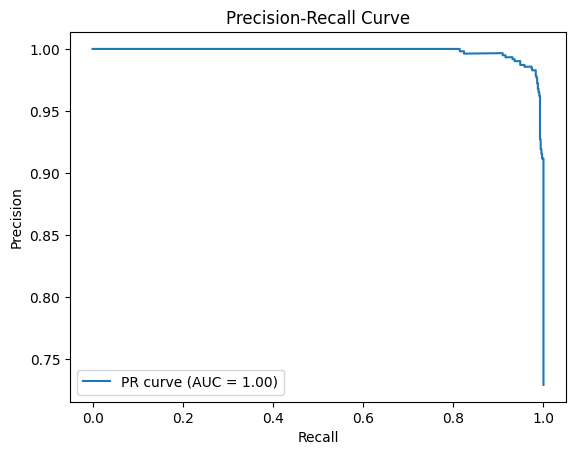


Visualizing Random Samples:


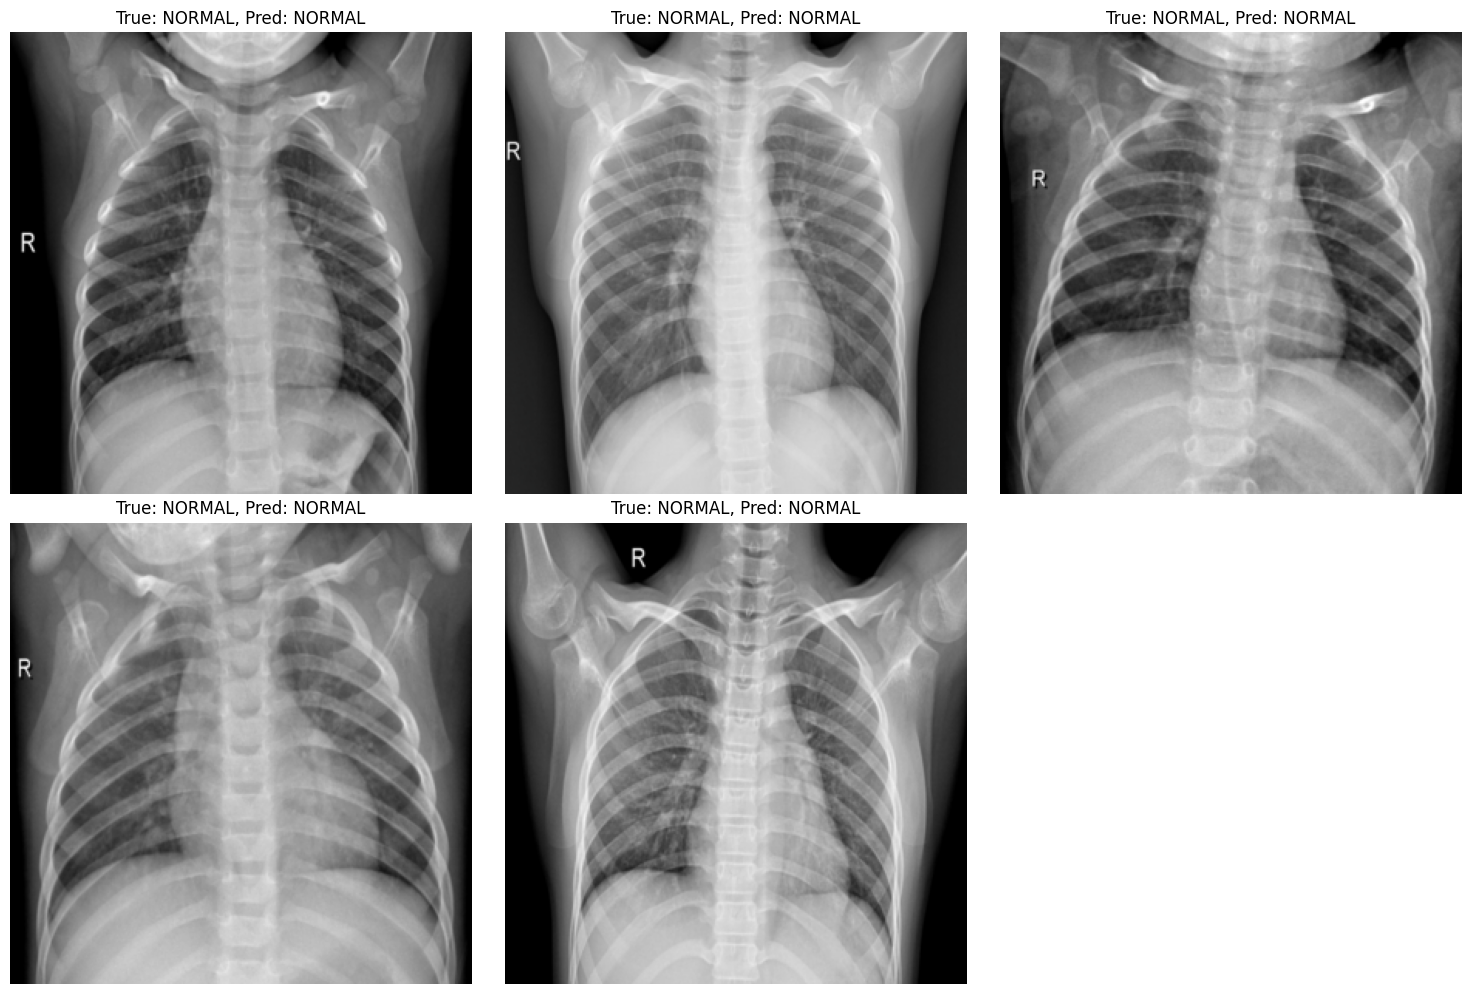


Metrics and confusion matrix saved to /kaggle/working/test_results.json


  0%|          | 0/1000 [00:00<?, ?it/s]

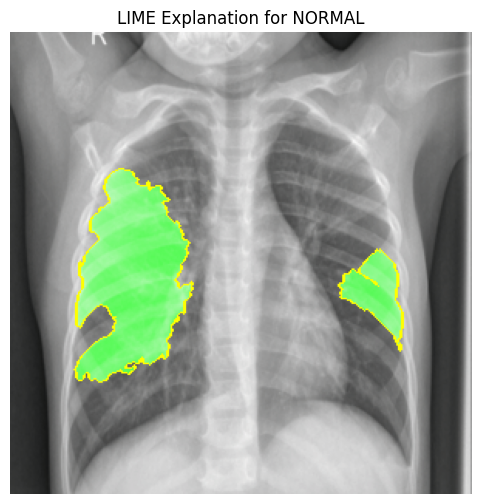

In [13]:
# -------------------------------
# 12. Evaluation and Visualization Function
# -------------------------------
def evaluate_and_visualize_model(model, test_loader, class_names):
    model.eval()
    all_preds = []
    all_labels = []
    random_samples = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            # Collect random samples for visualization
            if len(random_samples) < 5:  # Limit to 5 samples
                num_collect = min(2, inputs.size(0), 5 - len(random_samples))
                random_indices = random.sample(range(inputs.size(0)), num_collect)
                for idx in random_indices:
                    # Ensure the tensor is on CPU before appending
                    random_samples.append((inputs[idx].cpu(), preds[idx].item(), labels[idx].item()))
                    if len(random_samples) >= 5:
                        break

    # Classification report
    print("Classification Report:")
    report = classification_report(all_labels, all_preds, target_names=class_names, output_dict=True)
    print(classification_report(all_labels, all_preds, target_names=class_names))

    # Confusion matrix
    print("\nConfusion Matrix:")
    cm = confusion_matrix(all_labels, all_preds)
    print(cm)

    # Detailed Metrics per class
    metrics = {
        class_name: {
            "precision": report[class_name]["precision"],
            "recall": report[class_name]["recall"],
            "f1-score": report[class_name]["f1-score"],
            "support": report[class_name]["support"]
        }
        for class_name in class_names
    }
    print("\nDetailed Metrics per Class:")
    for class_name, class_metrics in metrics.items():
        print(f"{class_name}: {class_metrics}")

    # Compute additional metrics: ROC and Precision-Recall AUC (binary classification assumed)
    if len(class_names) == 2:
        model.eval()
        all_probs = []
        with torch.no_grad():
            for inputs, _ in test_loader:
                inputs = inputs.to(device)
                outputs = model(inputs)
                probs = F.softmax(outputs, dim=1)
                all_probs.append(probs.cpu().numpy())
        all_probs = np.concatenate(all_probs)

        y_true = np.array(all_labels)
        y_score = all_probs[:, 1]

        # ROC Curve
        fpr, tpr, _ = roc_curve(y_true, y_score)
        roc_auc = auc(fpr, tpr)

        print(f"\nROC AUC: {roc_auc:.4f}")

        plt.figure()
        plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc='lower right')
        plt.show()

        # Precision-Recall Curve
        precision, recall, _ = precision_recall_curve(y_true, y_score)
        pr_auc = auc(recall, precision)

        print(f"Precision-Recall AUC: {pr_auc:.4f}")

        plt.figure()
        plt.plot(recall, precision, label=f'PR curve (AUC = {pr_auc:.2f})')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc='lower left')
        plt.show()

    # Visualize random samples
    print("\nVisualizing Random Samples:")
    plt.figure(figsize=(15, 10))
    for i, (img, pred, true) in enumerate(random_samples):
        img_disp = img.clone()
        img_disp = img_disp.permute(1, 2, 0)
        img_disp = img_disp * torch.tensor([0.229, 0.224, 0.225]) + torch.tensor([0.485, 0.456, 0.406])
        img_disp = img_disp.numpy().clip(0, 1)

        plt.subplot(2, 3, i + 1)
        plt.imshow(img_disp)
        plt.title(f"True: {class_names[true]}, Pred: {class_names[pred]}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

    return metrics, cm, (all_labels, all_preds, all_probs if len(class_names) == 2 else None)

# -------------------------------
# 13. Evaluate the Model and Visualize Results
# -------------------------------
test_metrics, confusion_mat, extra_info = evaluate_and_visualize_model(model, test_loader, class_names)

# -------------------------------
# 14. Save the Metrics and Confusion Matrix
# -------------------------------
results_save_path = '/kaggle/working/test_results.json'
with open(results_save_path, 'w') as f:
    json.dump({"metrics": test_metrics, "confusion_matrix": confusion_mat.tolist()}, f)
print(f"\nMetrics and confusion matrix saved to {results_save_path}")

# -------------------------------
# 15. Apply LIME for Local Explainability
# -------------------------------
# Helper: Unnormalize and convert tensor image to numpy
inv_transform = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.225],
    std=[1/0.229, 1/0.224, 1/0.225]
)

def tensor_to_img_np(tensor_img):
    img = tensor_img.clone()
    img = inv_transform(img)
    img = img.permute(1, 2, 0).cpu().numpy().clip(0, 1)  # Ensure tensor is on CPU
    return (img * 255).astype(np.uint8)  # Correct scaling factor

# Get a single image from test set for LIME
model.eval()
single_batch = next(iter(test_loader))
x_batch, y_batch = single_batch
x_sample = x_batch[0].to(device)
y_sample = y_batch[0].item()

# Prediction function for LIME (expects list of images as numpy arrays)
def lime_predict(images):
    model.eval()
    batch = []
    for img in images:
        # Convert uint8 [0,255] to float tensor [0,1]
        img_t = transforms.ToTensor()(Image.fromarray(img))
        # Apply normalization
        img_t = transforms.Normalize([0.485, 0.456, 0.406],
                                     [0.229, 0.224, 0.225])(img_t)
        batch.append(img_t)
    batch = torch.stack(batch).to(device)
    with torch.no_grad():
        outputs = model(batch)
        probs = F.softmax(outputs, dim=1).cpu().numpy()
    return probs

# Use LIME ImageExplainer
explainer = lime_image.LimeImageExplainer()
# Convert the sample to numpy image
img_np = tensor_to_img_np(x_batch[0])
explanation = explainer.explain_instance(img_np, lime_predict, top_labels=2, hide_color=0, num_samples=1000)

# Display LIME explanation
from skimage.segmentation import mark_boundaries

lime_label = explanation.top_labels[0]
temp, mask = explanation.get_image_and_mask(lime_label, positive_only=False, num_features=5, hide_rest=False)
plt.figure(figsize=(6,6))
plt.imshow(mark_boundaries(temp, mask))
plt.title(f"LIME Explanation for {class_names[lime_label]}")
plt.axis('off')
plt.show()